## Portfolio



### The purpose of this project is to demonstrate the skills that I learned from my campus.

<br>

### Skill included:
<ul>
    <li>Data Cleaning/Data Pre-processing/Data transformation</li>
    <li>Exploratory Data Analysis/Data Visualization</li>
    <li>Data Mining Techniques</li>
    <li>Data Modelling</li>
</ul>


#### This is the real life dataset which contained alot of noisy data, inbalance data, etc. I get it from my Professor.

### Data Cleaning/ Data Pre-processing/ Data Transformation

In [1]:
# Basic libraries which used to perform some calculations.
import numpy as np
import pandas as pd

# This library mainly to remove the restrictions setted by the developer 
# when viewing the vavriable in the table
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
# Read the dataset
df = pd.read_csv('Insurance_Data.csv')

In [3]:
df.head()

,Age,Gender,MaritalStatus,SmokerStatus,LifeStyle,LanguageSpoken,HighestEducation,Race,Nationality,MalaysiaPR,MovingToNewCompany,Occupation,Telco,HomeAddress,ResidentialType,NoOfDependent,FamilyExpenses(month),AnnualSalary,Customer_Needs_1,Customer_Needs_2,PurchasedPlan1,Transport,PurchasedPlan2,MedicalComplication
0,35.0,female,single,NaN,home,english,Bachelor,malay,NaN,yes,yes,employer,maxis,north_mal,terrace,2.0,10242.0,NaN,PersonalSaving,KidMedical,SchoolAgain,driving,NoMoneyDown,no
1,25.0,male,NaN,NaN,outdoor,malay,Diploma,chinese,Malaysian,no,yes,selfEmployed,umobile,east_mal,terrace,2.0,NaN,73926.0,PersonalRetirement,KidMedical,SchoolAgain,driving,XEdu,yes
2,27.0,male,NaN,frequent,pub_goer,english,Bachelor,others,NaN,no,no,privateEemployee,celcom,central_mal,condominium,2.0,4316.0,140734.0,PersonalMedical,KidMedical,SchoolAgain,driving,KidsFlyUp,yes
3,33.0,female,NaN,once_in_a_while,pub_goer,english,Bachelor,malay,Malaysian,yes,no,privateEemployee,maxis,south_mal,terrace,NaN,4845.0,NaN,PersonalSaving,KidSaving,SchoolAgain,driving,NoMoneyDown,no
4,28.0,female,NaN,once_in_a_while,home,english,Bachelor,chinese,Malaysian,yes,yes,privateEemployee,umobile,east_mal,condominium,2.0,9883.0,98833.0,PersonalRetirement,KidEducation,COVIDFree,driving,KidsFlyUp,yes


In [4]:
# Check the data type and dimension of the table
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    408 non-null    float64
 1   Gender                 500 non-null    object 
 2   MaritalStatus          358 non-null    object 
 3   SmokerStatus           434 non-null    object 
 4   LifeStyle              500 non-null    object 
 5   LanguageSpoken         500 non-null    object 
 6   HighestEducation       500 non-null    object 
 7   Race                   385 non-null    object 
 8   Nationality            355 non-null    object 
 9   MalaysiaPR             500 non-null    object 
 10  MovingToNewCompany     500 non-null    object 
 11  Occupation             355 non-null    object 
 12  Telco                  500 non-null    object 
 13  HomeAddress            421 non-null    object 
 14  ResidentialType        500 non-null    object 
 15  NoOfDe

In [5]:
# Age and NoOfDependent variables are supposed should be in interger format.

In [6]:
# Check whether this dataset contained any null value.
# Using this library to visualize the number of null value.
import missingno as msno

<AxesSubplot:>

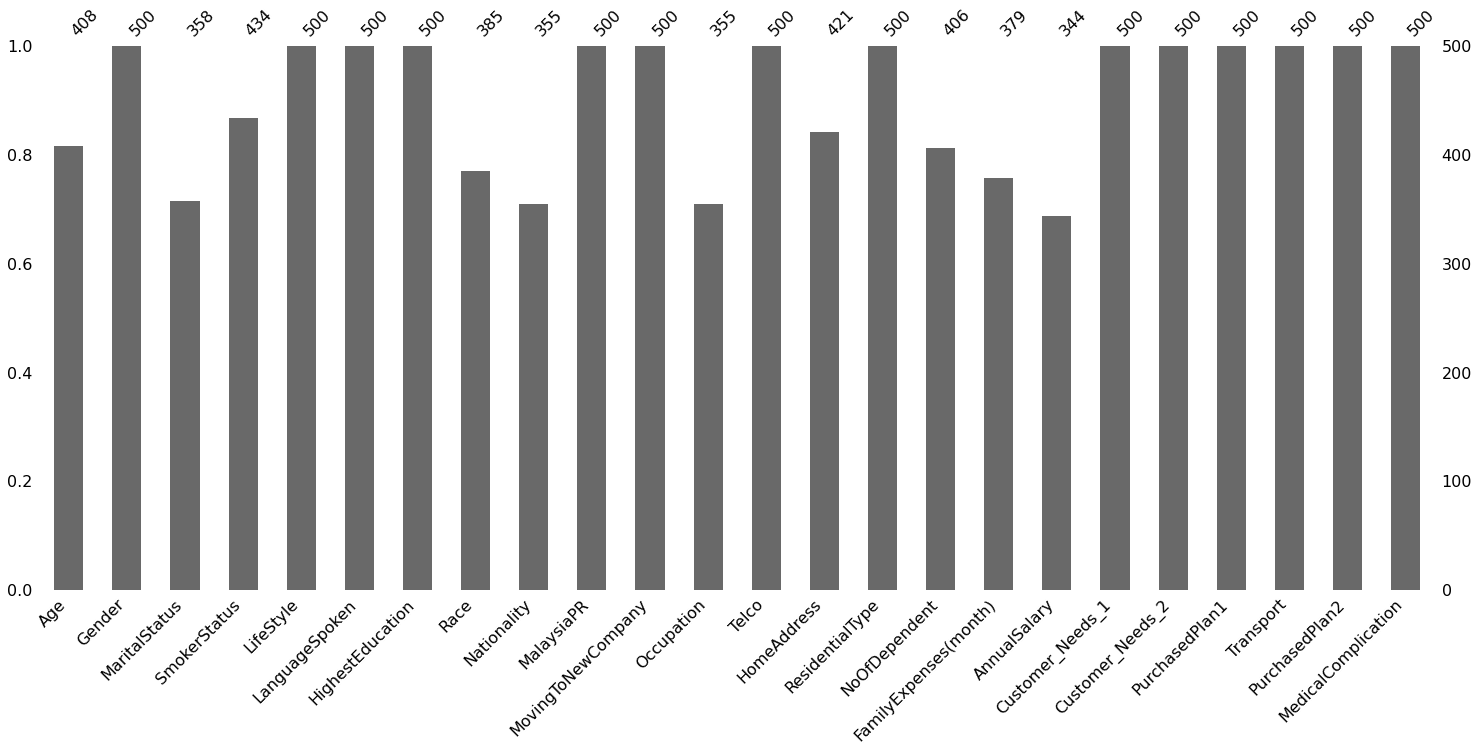

In [7]:
# Display in the bar chart form.
msno.bar(df)

In [8]:
# Only few variables does not meet to 500 which indicated there are 
# some null values in Age, MaritalStatus,SmokerStatus,Race,Nationality,
# Occupation, HomeAddress,Nofdependent,FamilyExpenses, and lastly AnnualSalary.

In [9]:
# Display in text form.
df.isna().sum()

Age                       92
Gender                     0
MaritalStatus            142
SmokerStatus              66
LifeStyle                  0
LanguageSpoken             0
HighestEducation           0
Race                     115
Nationality              145
MalaysiaPR                 0
MovingToNewCompany         0
Occupation               145
Telco                      0
HomeAddress               79
ResidentialType            0
NoOfDependent             94
FamilyExpenses(month)    121
AnnualSalary             156
Customer_Needs_1           0
Customer_Needs_2           0
PurchasedPlan1             0
Transport                  0
PurchasedPlan2             0
MedicalComplication        0
dtype: int64

In [10]:
# Now, I am handling missing value by using machine learning approach.
# Reason of using this method because predict the value is more suitable
# for this case since large amount of null data is found in this dataset.


# - K Nearest Neighbour Imputer (for numerical variables)
# - Fill missing value with global contant value "unknown" (for categorical variables)

# Imputer library.
from sklearn.impute import KNNImputer

# Make a copy.
df_1 = df.copy()

# dropna() is not a wise option as it will reduce too many rows.
# fillna() with "mean, mode, median" will introduce bias data which will affect the model performance when testing.
# Instead using "mean, mode, median", we use knn impute to fill the NaN value for numerical variables.
num_cols = ['Age', 'NoOfDependent', 'FamilyExpenses(month)', 'AnnualSalary']
imputer = KNNImputer(n_neighbors = 3)
df_1[num_cols] = imputer.fit_transform(df_1[num_cols])
df_1[num_cols] = df_1[num_cols].round() # Round the value.

# Since we do not know wat is the NaN value for categorical features.
# Hence, we introduce a new value by fillna() with 'unknown'.
const = 'unknown'
df_1 = df_1.fillna(const)

# For other use.
df_dm = df_1.copy() 

In [11]:
#df_1.isna().sum()

In [12]:
# Fix the variables type for Age and Number Of dependent.
# Cast from float into an integer.
df_1.Age = df_1.Age.astype('int64')
df_1.NoOfDependent = df_1.NoOfDependent.astype('int64')

In [13]:
# Adding new variable because I can calculate client saving(month).
# Formula is (Annual Salary/12) - Family Expenses
df_1['Saving(month)'] = (df_1['AnnualSalary']/12) - df_1['FamilyExpenses(month)']
df_1

,Age,Gender,MaritalStatus,SmokerStatus,LifeStyle,LanguageSpoken,HighestEducation,Race,Nationality,MalaysiaPR,MovingToNewCompany,Occupation,Telco,HomeAddress,ResidentialType,NoOfDependent,FamilyExpenses(month),AnnualSalary,Customer_Needs_1,Customer_Needs_2,PurchasedPlan1,Transport,PurchasedPlan2,MedicalComplication,Saving(month)
0,35,female,single,unknown,home,english,Bachelor,malay,unknown,yes,yes,employer,maxis,north_mal,terrace,2,10242.0,100793.0,PersonalSaving,KidMedical,SchoolAgain,driving,NoMoneyDown,no,-1842.583333
1,25,male,unknown,unknown,outdoor,malay,Diploma,chinese,Malaysian,no,yes,selfEmployed,umobile,east_mal,terrace,2,6821.0,73926.0,PersonalRetirement,KidMedical,SchoolAgain,driving,XEdu,yes,-660.500000
2,27,male,unknown,frequent,pub_goer,english,Bachelor,others,unknown,no,no,privateEemployee,celcom,central_mal,condominium,2,4316.0,140734.0,PersonalMedical,KidMedical,SchoolAgain,driving,KidsFlyUp,yes,7411.833333
3,33,female,unknown,once_in_a_while,pub_goer,english,Bachelor,malay,Malaysian,yes,no,privateEemployee,maxis,south_mal,terrace,2,4845.0,93913.0,PersonalSaving,KidSaving,SchoolAgain,driving,NoMoneyDown,no,2981.083333
4,28,female,unknown,once_in_a_while,home,english,Bachelor,chinese,Malaysian,yes,yes,privateEemployee,umobile,east_mal,condominium,2,9883.0,98833.0,PersonalRetirement,KidEducation,COVIDFree,driving,KidsFlyUp,yes,-1646.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,24,female,married,frequent,outdoor,english,Diploma,unknown,unknown,yes,yes,unknown,digi,north_mal,terrace,2,4831.0,74541.0,PersonalRetirement,KidMedical,HomeSafe,driving,KidsFlyUp,yes,1380.750000
496,26,male,married,frequent,home,english,Bachelor,others,unknown,no,no,selfEmployed,maxis,east_mal,condominium,2,7455.0,65384.0,PersonalMedical,KidEducation,SchoolAgain,driving,KidsFlyUp,no,-2006.333333
497,19,female,unknown,frequent,home,malay,Diploma,others,unknown,yes,no,unknown,maxis,central_mal,condominium,2,3329.0,51962.0,PersonalSaving,KidEducation,COVIDFree,driving,KidsFlyUp,no,1001.166667
498,41,male,unknown,once_in_a_while,pub_goer,malay,Bachelor,indian,Malaysian,yes,yes,privateEemployee,umobile,unknown,terrace,3,9300.0,147834.0,PersonalRetirement,KidSaving,COVIDFree,driving,KidsFlyUp,no,3019.500000


In [14]:
# However, some client Salary(Month) showed some noisy data in the 
# certain rows because it contained the negative value.  
# It indicate that customer do not have any saving due to the 
# FamilyExpenses(Month).

In [15]:
# Re-arrange the column for better view.
df_1 = df_1[['Age','Gender', 'MaritalStatus', 'SmokerStatus', 'LifeStyle',
             'LanguageSpoken', 'HighestEducation', 'Race', 'Nationality',
             'MalaysiaPR', 'MovingToNewCompany', 'Occupation', 'Telco',
             'HomeAddress', 'ResidentialType', 'NoOfDependent', 'FamilyExpenses(month)', 
             'AnnualSalary', 'Saving(month)', 'Customer_Needs_1', 'Customer_Needs_2', 
             'PurchasedPlan1', 'Transport', 'PurchasedPlan2', 'MedicalComplication']]

<br>

### Exploratory Data Analysis

In [16]:
grouped_age = df_1.groupby('Age').mean()
grouped_age.NoOfDependent = round(grouped_age.NoOfDependent)
grouped_age.NoOfDependent = grouped_age.NoOfDependent.astype('int64')
grouped_age

,NoOfDependent,FamilyExpenses(month),AnnualSalary,Saving(month)
Age,,,,
18,2,5599.526316,114017.105263,3901.899123
19,2,5721.153846,120798.461538,4345.384615
20,2,6617.375000,118053.562500,3220.421875
21,2,6339.529412,124956.352941,4073.500000
22,2,6988.166667,112425.916667,2380.659722
23,2,6297.277778,141957.055556,5532.476852
24,2,5880.966667,91606.333333,1752.894444
25,2,6502.523810,111883.000000,2821.059524
26,2,6701.400000,125868.200000,3787.616667


In [17]:
# This is summarize of the client data about how many they earn/used in 
# FamilyExpense, AnnualSalary, and Saving based on the age.

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

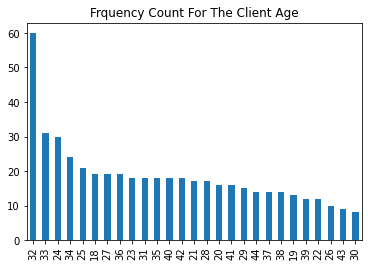

(Text(0.5, 1.0, 'Frquency Count For The Client Age'), None)

In [19]:
# I am interest which client appeared the most
# in term of age.
df_1['Age'].value_counts().plot(kind = 'bar'), 
plt.title('Frquency Count For The Client Age'), plt.show()

In [20]:
# So, clients with age 32 shown the most in this dataframe.
# Which indicated middle age adult can be afforded to buy the insurance
# plan from this company.

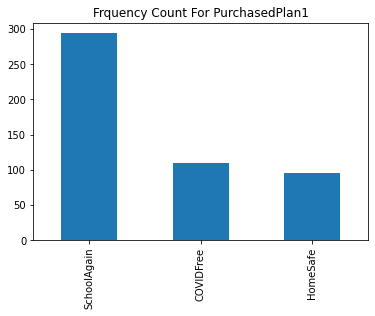

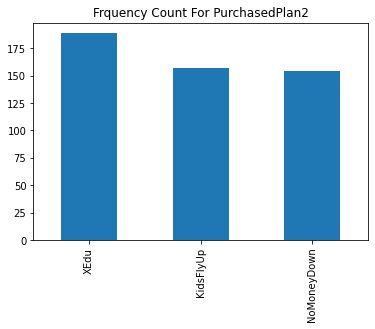

(<AxesSubplot:title={'center':'Frquency Count For PurchasedPlan2'}>,
 Text(0.5, 1.0, 'Frquency Count For PurchasedPlan2'),
 None)

In [21]:
# Let see how many insurance plan have been selled.

#df_1['Customer_Needs_1'].value_counts().plot(kind = 'bar'), plt.title('Frquency Count For Customer_Needs_1'), plt.show()
#df_1['Customer_Needs_2'].value_counts().plot(kind = 'bar'), plt.title('Frquency Count For Customer_Needs_2'), plt.show()
df_1['PurchasedPlan1'].value_counts().plot(kind = 'bar'), plt.title('Frquency Count For PurchasedPlan1'), plt.show()
df_1['PurchasedPlan2'].value_counts().plot(kind = 'bar'), plt.title('Frquency Count For PurchasedPlan2'), plt.show()

In [22]:
# These are the total number of each insurance plans that selled/chosen by the client
# based on their needs.


### Data Modelling

In [23]:
# Because machine learning cannot classified the string values.
# So I have to perform some transformation/processing for the dataset.

# We replace the value from string to the numerical value on certain variables.
# Nan/unknown value will set to 0 as a default.

# Replace the value.
df_1['Gender'].replace(('male','female'),(1,2), inplace = True)
df_1['MalaysiaPR'].replace(('yes','no'),(1,0), inplace = True)
df_1['MovingToNewCompany'].replace(('yes','no'),(1,0), inplace = True)
df_1['MedicalComplication'].replace(('yes','no'),(1,0), inplace = True)

df_1['MaritalStatus'].replace(('unknown','single','married'), (0,1,2), inplace = True)
df_1['SmokerStatus'].replace(('unknown','once_in_a_while','sometimes','frequent'),(0,1,2,3), inplace = True)
df_1['LifeStyle'].replace(('home','outdoor','pub_goer'),(1,2,3), inplace = True)
df_1['LanguageSpoken'].replace(('english','malay','mandarin'),(1,2,3), inplace = True)
df_1['HighestEducation'].replace(('Bachelor','Diploma','Master','PhD'),(1,2,3,4), inplace = True)
df_1['Race'].replace(('unknown','malay','chinese','indian','others'),(0,1,2,3,4), inplace = True)
df_1['Nationality'].replace(('unknown','Malaysian','others'),(0,1,2), inplace = True)
df_1['Occupation'].replace(('unknown','employer','selfEmployed','privateEemployee','govServant'),(0,1,2,3,4), inplace = True)
df_1['Telco'].replace(('maxis','umobile','celcom','digi'),(1,2,3,4), inplace = True)
df_1['HomeAddress'].replace(('unknown','north_mal','east_mal','central_mal','south_mal'),(0,1,2,3,4), inplace = True)
df_1['ResidentialType'].replace(('terrace','condominium','flat','bungalow'),(1,2,3,4), inplace = True)
df_1['Customer_Needs_1'].replace(('PersonalSaving','PersonalRetirement','PersonalMedical'),(1,2,3), inplace = True)
df_1['Customer_Needs_2'].replace(('KidMedical','KidSaving','KidEducation'),(1,2,3), inplace = True)
df_1['PurchasedPlan1'].replace(('SchoolAgain','COVIDFree','HomeSafe'),(1,2,3), inplace = True)
df_1['PurchasedPlan2'].replace(('NoMoneyDown','XEdu','KidsFlyUp'),(1,2,3), inplace = True)
df_1['Transport'].replace(('driving','publicTransport'),(1,2), inplace = True)

In [24]:
# Check the data type and correct it if it is necessary.
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    500 non-null    int64  
 1   Gender                 500 non-null    int64  
 2   MaritalStatus          500 non-null    int64  
 3   SmokerStatus           500 non-null    int64  
 4   LifeStyle              500 non-null    int64  
 5   LanguageSpoken         500 non-null    int64  
 6   HighestEducation       500 non-null    int64  
 7   Race                   500 non-null    int64  
 8   Nationality            500 non-null    int64  
 9   MalaysiaPR             500 non-null    int64  
 10  MovingToNewCompany     500 non-null    int64  
 11  Occupation             500 non-null    int64  
 12  Telco                  500 non-null    int64  
 13  HomeAddress            500 non-null    int64  
 14  ResidentialType        500 non-null    int64  
 15  NoOfDe

In [25]:
# Cast the variable type into the correct format.
'''
df_1.Age = df_1.Age.astype('int64')
df_1.Gender = df_1.Gender.astype('int64')
df_1.MaritalStatus = df_1.MaritalStatus.astype('int64')
df_1.SmokerStatus = df_1.SmokerStatus.astype('int64')
df_1.LifeStyle = df_1.LifeStyle.astype('int64')
df_1.LanguageSpoken = df_1.LanguageSpoken.astype('int64')
df_1.HighestEducation = df_1.HighestEducation.astype('int64')
df_1.Race = df_1.Race.astype('int64')
df_1.Nationality = df_1.Nationality.astype('int64')
df_1.MalaysiaPR = df_1.MalaysiaPR.astype('int64')
df_1.MovingToNewCompany = df_1.MovingToNewCompany.astype('int64')
df_1.Occupation = df_1.Occupation.astype('int64')
df_1.Telco = df_1.Telco.astype('int64')
df_1.HomeAddress = df_1.HomeAddress.astype('int64')
df_1.ResidentialType = df_1.ResidentialType.astype('int64')
df_1.Customer_Needs_1 = df_1.Customer_Needs_1.astype('int64')
df_1.Customer_Needs_2 = df_1.Customer_Needs_2.astype('int64')
df_1.PurchasedPlan1 = df_1.PurchasedPlan1.astype('int64')
df_1.PurchasedPlan2 = df_1.PurchasedPlan2.astype('int64')
df_1.Transport = df_1.Transport.astype('int64')
df_1.MedicalComplication = df_1.MedicalComplication.astype('int64')

df_1.NoOfDependent = round(df_1.NoOfDependent)
df_1.NoOfDependent = df_1.NoOfDependent.astype('int64')

'''


"\ndf_1.Age = df_1.Age.astype('int64')\ndf_1.Gender = df_1.Gender.astype('int64')\ndf_1.MaritalStatus = df_1.MaritalStatus.astype('int64')\ndf_1.SmokerStatus = df_1.SmokerStatus.astype('int64')\ndf_1.LifeStyle = df_1.LifeStyle.astype('int64')\ndf_1.LanguageSpoken = df_1.LanguageSpoken.astype('int64')\ndf_1.HighestEducation = df_1.HighestEducation.astype('int64')\ndf_1.Race = df_1.Race.astype('int64')\ndf_1.Nationality = df_1.Nationality.astype('int64')\ndf_1.MalaysiaPR = df_1.MalaysiaPR.astype('int64')\ndf_1.MovingToNewCompany = df_1.MovingToNewCompany.astype('int64')\ndf_1.Occupation = df_1.Occupation.astype('int64')\ndf_1.Telco = df_1.Telco.astype('int64')\ndf_1.HomeAddress = df_1.HomeAddress.astype('int64')\ndf_1.ResidentialType = df_1.ResidentialType.astype('int64')\ndf_1.Customer_Needs_1 = df_1.Customer_Needs_1.astype('int64')\ndf_1.Customer_Needs_2 = df_1.Customer_Needs_2.astype('int64')\ndf_1.PurchasedPlan1 = df_1.PurchasedPlan1.astype('int64')\ndf_1.PurchasedPlan2 = df_1.Purcha

### Feature Selection

In [26]:
# Perform feature selection to filter some variables.
# I will demostrate 2 methods.
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.feature_selection import RFECV

from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm_notebook, tqdm
tqdm.pandas()

# For targeted variables (Y) are PurchasedPlan1 and PurchasedPlan2.
# Because I am interest what client will choose for the plan based on their need.

# Test data
y_1 = df_1.PurchasedPlan1
y_2 = df_1.PurchasedPlan2

# =Train data
x_1 = df_1.drop('PurchasedPlan1', 1)
x_2 = df_1.drop('PurchasedPlan2', 1)

colnames_1 = x_1.columns
colnames_2 = x_2.columns

# Can choose either one but I am interest on purchased plan 1

In [27]:
# This is a function to do the ranking of the variables.
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

### Boruta classifier

In [28]:
# Prepare Boruta classifier
rf = RandomForestClassifier(n_jobs = -1, class_weight = 'balanced', 
                            max_depth = 5)
feat_selector = BorutaPy(rf, n_estimators = 'auto', random_state = 2)

# Fit Boruta classifier to data
feat_selector.fit(x_1.values, y_1.values.ravel())

# Get the ranking of the features returned by Boruta
boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames_1, order = -1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns = ['Features', 'Score'])
boruta_score = boruta_score.sort_values('Score', ascending = False)

In [29]:
# Top 15feature selected variables.
display(boruta_score.head(15))

,Features,Score
18,Saving(month),1.00
0,Age,0.96
17,AnnualSalary,0.91
16,FamilyExpenses(month),0.91
13,HomeAddress,0.83
3,SmokerStatus,0.83
7,Race,0.74
22,PurchasedPlan2,0.70
2,MaritalStatus,0.65
12,Telco,0.61


Text(0.5, 1.0, 'Boruta Features')

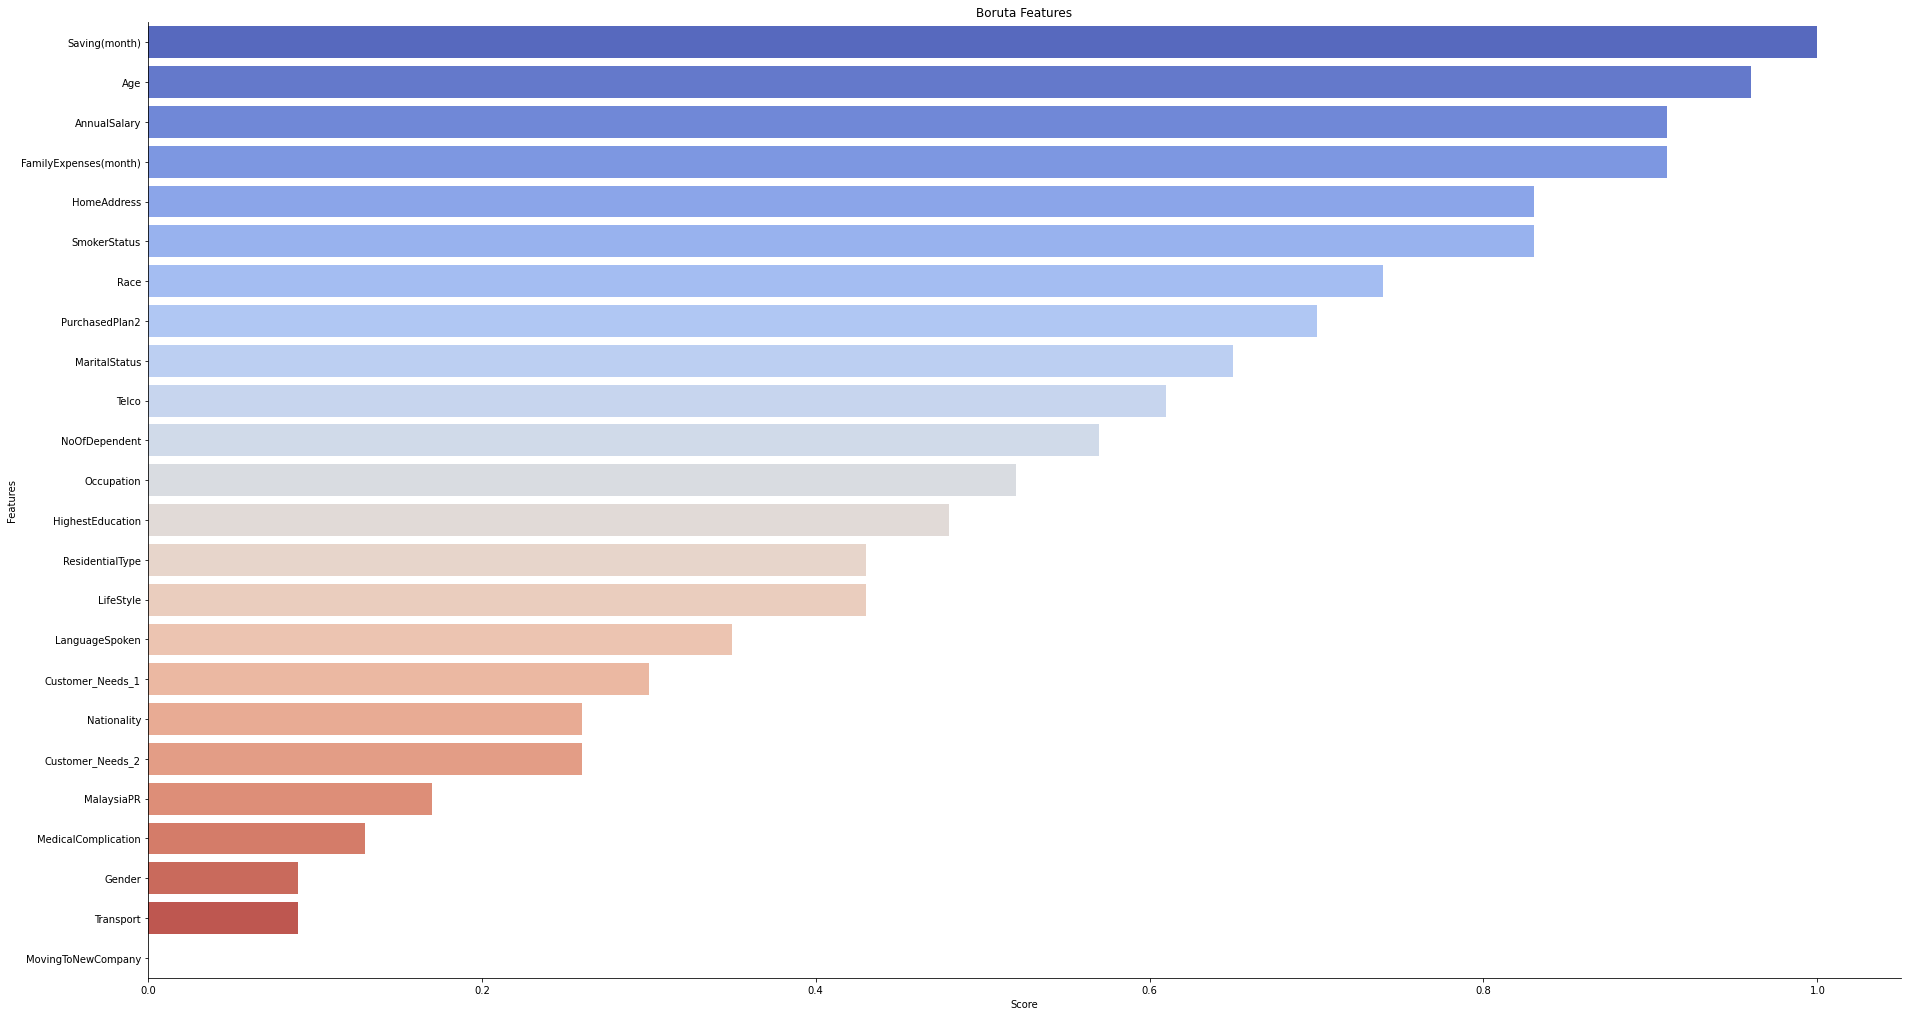

In [30]:
# Visualize it for the overview.
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[0:40], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')

plt.title("Boruta Features")

### RFE classifier

In [31]:
# Prepare RFE classifier
rf = RandomForestClassifier(n_jobs = -1, class_weight = 'balanced', max_depth = 5, n_estimators = 100)
rf.fit(x_1, y_1)
rfe = RFECV(rf, min_features_to_select = 1, cv = 3)

# Fit RFE classifier to data
rfe.fit(x_1, y_1)

# Get the ranking of the features returned by RFE
rfe_score = ranking(list(map(float, rfe.ranking_)), colnames_1, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)

In [32]:
# Top 15feature selected variables.
display(rfe_score.head(15))

,Features,Score
0,Age,1.0
1,Gender,1.0
22,PurchasedPlan2,1.0
20,Customer_Needs_2,1.0
19,Customer_Needs_1,1.0
18,Saving(month),1.0
17,AnnualSalary,1.0
16,FamilyExpenses(month),1.0
15,NoOfDependent,1.0
14,ResidentialType,1.0


Text(0.5, 1.0, 'RFE Features')

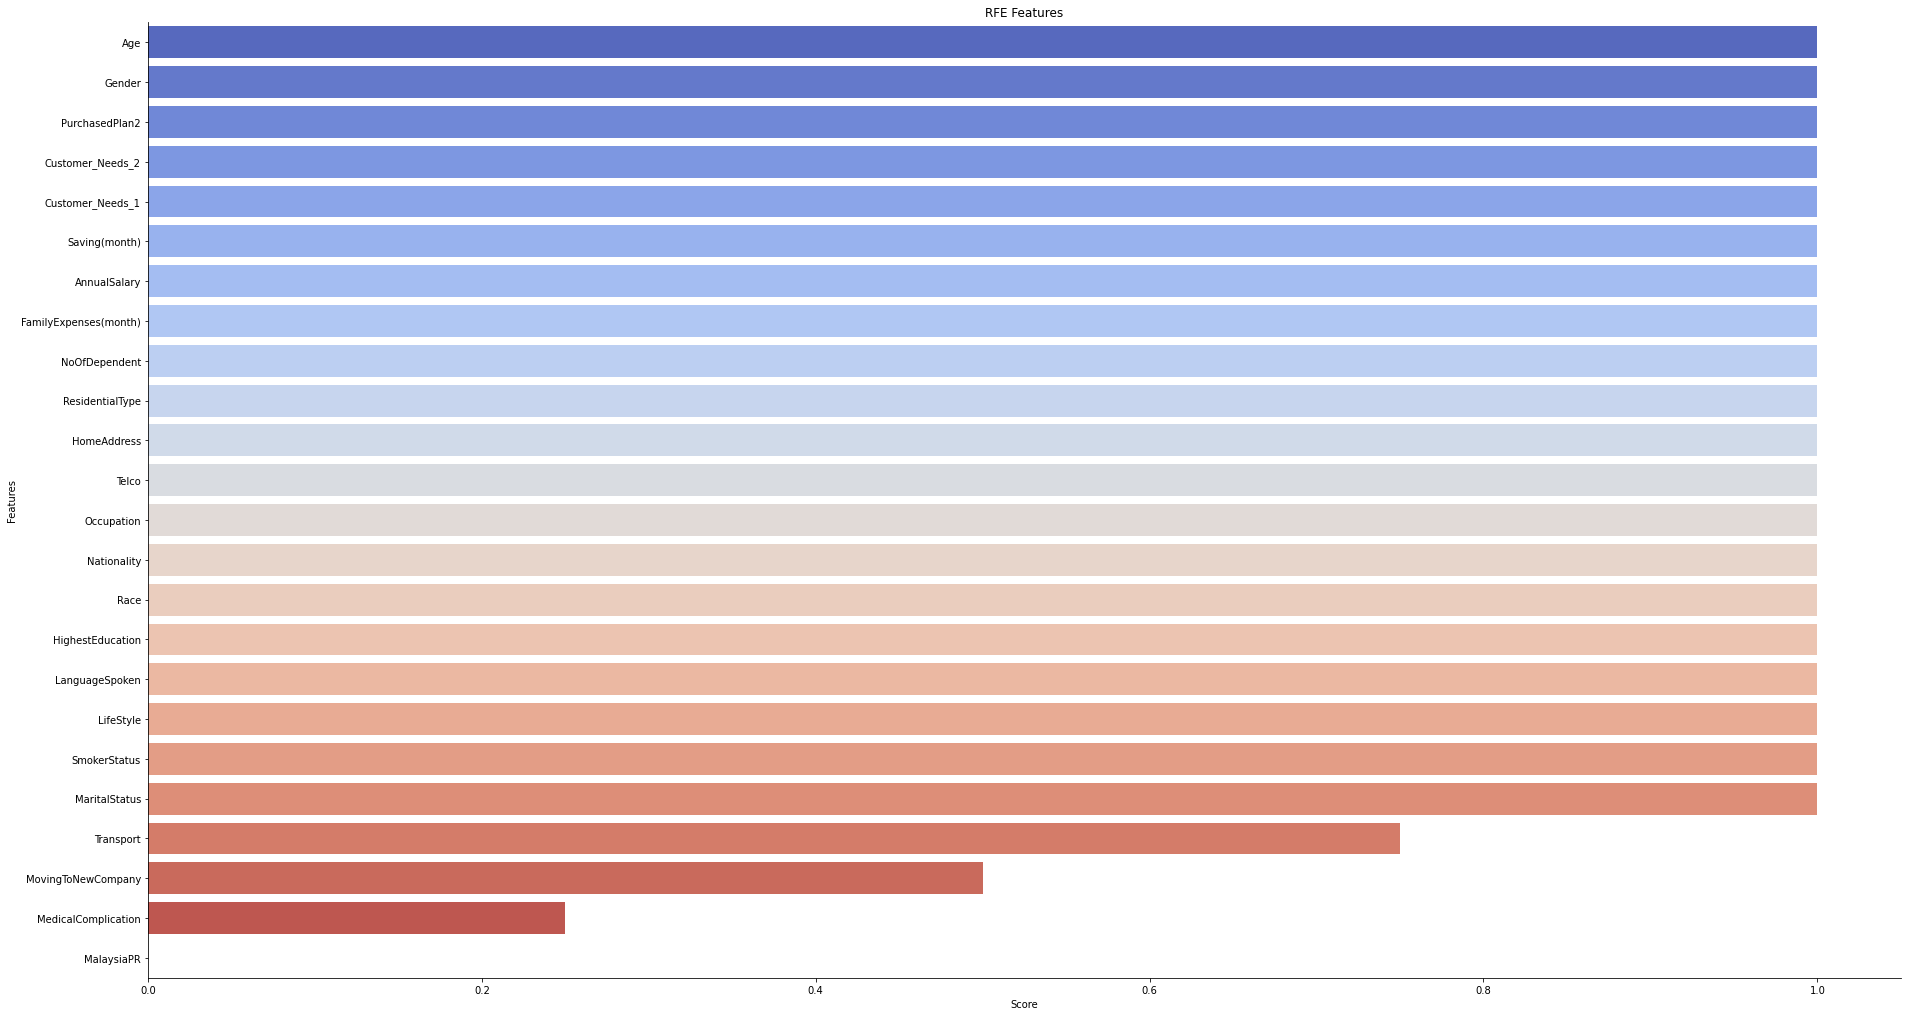

In [33]:
# Visualize it for the overview.
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = rfe_score[0:30], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("RFE Features")

In [34]:
# It seem RFE has a better result, only minor of the variables is not usable.
# I am using the result generated by the RFE to clean some unused variables.


### Machine Learning Techniques

In [35]:
# X train dataset
mld_x = x_1.copy()
mld_x = mld_x.drop(columns = ['Transport','MovingToNewCompany','Gender'])

# Y test dataset
mld_y = y_1.copy()

In [36]:
# Common ML libraries
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [37]:
# Extra libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

In [38]:
# Prediction on PurchasedPlan1.
X_train, X_test, y_train, y_test = train_test_split(
    mld_x, mld_y, test_size = 0.3, random_state = 5)

rf = RandomForestClassifier(n_estimators = 200, random_state = 3, max_depth = 20)
rf.fit(X_train, y_train)
print("Random Forest accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Random Forest accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))
print('')

SV = SVC(kernel = 'rbf', gamma = 'auto', C = 1E6)
SV.fit(X_train, y_train)
print("SVC accuracy on training set: {:.3f}".format(SV.score(X_train, y_train)))
print("SVC Forest accuracy on test set: {:.3f}".format(SV.score(X_test, y_test)))
print('')

kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(X_train, y_train)
print("KNN accuracy on training set: {:.3f}".format(kn.score(X_train, y_train)))
print("KNN accuracy on test set: {:.3f}".format(kn.score(X_test, y_test)))
print('')

nb = GaussianNB() 
nb.fit(X_train, y_train)
print("Naive Bayes accuracy on training set: {:.3f}".format(nb.score(X_train, y_train)))
print("Naive Bayes Forest accuracy on test set: {:.3f}".format(nb.score(X_test, y_test)))
print('')

Random Forest accuracy on training set: 1.000
Random Forest accuracy on test set: 0.653

SVC accuracy on training set: 1.000
SVC Forest accuracy on test set: 0.640

KNN accuracy on training set: 0.646
KNN accuracy on test set: 0.527

Naive Bayes accuracy on training set: 0.566
Naive Bayes Forest accuracy on test set: 0.640



In [39]:
# Classic methods did not provide a good result.
# Hence I am using stacking approach by combine the ML methods
# to see whether I will get a good result or not.

In [40]:
# Oversampling Technique
# To balance the inbalance dataset from X train.
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 1, k_neighbors = 3)

In [41]:
# Do train_test_split.
X_train, X_test, y_train, y_test = train_test_split(mld_x, mld_y, test_size = 0.35, random_state = 3)

# Apply smote technique to make train dataset more balance.
X_trainS, y_trainS = sm.fit_resample(X_train, y_train)

In [42]:
# I only show how to stack/combine multiple ml for this model.
estimators = [('KNN', KNeighborsClassifier(n_neighbors = 2)), ('NB', GaussianNB())]

SC = StackingClassifier(estimators = estimators, final_estimator = SVC(kernel = 'poly', gamma = 'auto', degree = 2))

SC.fit(X_trainS, y_trainS)
y_pred = SC.predict(X_test)

SC_score_train = SC.score(X_trainS, y_trainS)
SC_score_test = SC.score(X_test, y_test)
SC_precision_score = precision_score(y_test, y_pred, average = 'macro')
SC_recall_score = recall_score(y_test, y_pred, average = 'macro')
SC_F1_score = f1_score(y_test, y_pred, average = 'macro')
SC_accuracy_score = accuracy_score(y_test, y_pred)

print("Accuracy on training set: {:.3f}".format(SC_score_train))
print("Accuracy on test set: {:.3f}".format(SC_score_test))
print('')

confusion_majority = confusion_matrix(y_test, y_pred)

print('Majority classifier Confusion Matrix\n', confusion_majority)
print('')

print('Precision= {:.2f}'.format(SC_precision_score))
print('Recall= {:.2f}'. format(SC_recall_score))
print('F1= {:.2f}'. format(SC_F1_score))
print('Accuracy= {:.2f}'. format(SC_accuracy_score))

Accuracy on training set: 0.821
Accuracy on test set: 0.451

Majority classifier Confusion Matrix
 [[74 14 20]
 [25  3  4]
 [25  8  2]]

Precision= 0.26
Recall= 0.28
F1= 0.27
Accuracy= 0.45


In [43]:
# None of the methods provide a good accuracy.
# Since it just simply a demo then I just pick random forest method to predict the outcome.

In [44]:
# Input the data
prediction = rf.predict([[21,1,1,1,3,1,2,1,1,1,4,2,1,3,12000.4,101300.9,93000,1,1,1,0]])

In [45]:
# Display the result.
if(prediction[0] == 1):
    print('The predicted plan is', 'SchoolAgain') 
elif(prediction[0] == 2):
    print('The predicted plan is', 'COVIDFree')
else:
    print('The predicted plan is', 'HomeSafe')


The predicted plan is SchoolAgain



### Association Rule Mining

In [46]:
# Data mining related library.
from mlxtend.frequent_patterns import apriori, association_rules

In [47]:
# Make a copy.
arm_df = df_dm.copy()

# Drop the variables.
arm_col = ['Age', 'NoOfDependent', 'FamilyExpenses(month)', 'AnnualSalary']
arm_df.drop(columns = arm_col, inplace = True)

# Feature enginnering.
# Dummification/ One-Hot Encoding.
arm_df = pd.get_dummies(arm_df)

In [48]:
# Display the maximun text width.
pd.options.display.max_colwidth = 200

# Data Mining Technique.
# Perform apriori and association rule.
mlx_arm = apriori(arm_df, min_support = 0.04, use_colnames = True) # Minimum support = 0.04
rules = association_rules(mlx_arm, metric  = "confidence" , min_threshold = 0.8) # Minimum confidence = 0.8

In [49]:
# Display the set of rules (best 10 with lift more than 1.5).
rules.drop(columns = ['leverage', 'conviction'], inplace = True)
rules[rules['lift'] > 1.5].tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
12716,"(Gender_male, MalaysiaPR_yes, Transport_driving, LifeStyle_pub_goer, Nationality_Malaysian, HighestEducation_Bachelor)",(MovingToNewCompany_yes),0.060,0.568,0.052,0.866667,1.525822
12717,"(Gender_male, Transport_driving, LifeStyle_pub_goer, Nationality_Malaysian, HighestEducation_Bachelor)","(MovingToNewCompany_yes, MalaysiaPR_yes)",0.064,0.456,0.052,0.812500,1.781798
12787,"(SmokerStatus_sometimes, MedicalComplication_yes, Transport_driving, Nationality_Malaysian, PurchasedPlan1_SchoolAgain)","(HighestEducation_Bachelor, MalaysiaPR_yes)",0.052,0.508,0.044,0.846154,1.665657
12788,"(SmokerStatus_sometimes, MedicalComplication_yes, Nationality_Malaysian, HighestEducation_Bachelor, PurchasedPlan1_SchoolAgain)","(Transport_driving, MalaysiaPR_yes)",0.048,0.594,0.044,0.916667,1.543210
12811,"(MedicalComplication_yes, Occupation_govServant, Nationality_Malaysian, HighestEducation_Bachelor, PurchasedPlan1_SchoolAgain)","(Transport_driving, MalaysiaPR_yes)",0.044,0.594,0.040,0.909091,1.530456


In [50]:
rules['consequents'] = rules['consequents'].astype(str)
rules[rules['consequents'].str.contains('PurchasedPlan1') & rules['lift'] > 0.8].tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
12354,"(PurchasedPlan2_XEdu, MalaysiaPR_yes, HighestEducation_Bachelor, Nationality_Malaysian, MovingToNewCompany_yes)",frozenset({'PurchasedPlan1_SchoolAgain'}),0.048,0.588,0.040,0.833333,1.417234
12424,"(PurchasedPlan2_XEdu, Transport_driving, HighestEducation_Bachelor, Nationality_Malaysian, MovingToNewCompany_yes)",frozenset({'PurchasedPlan1_SchoolAgain'}),0.048,0.588,0.040,0.833333,1.417234
12490,"(MalaysiaPR_yes, MedicalComplication_yes, Occupation_govServant, Transport_driving, HighestEducation_Bachelor)",frozenset({'PurchasedPlan1_SchoolAgain'}),0.064,0.588,0.052,0.812500,1.381803
12584,"(MalaysiaPR_yes, MedicalComplication_yes, Occupation_govServant, Transport_driving, Nationality_Malaysian)",frozenset({'PurchasedPlan1_SchoolAgain'}),0.058,0.588,0.048,0.827586,1.407460
12806,"(MalaysiaPR_yes, MedicalComplication_yes, Occupation_govServant, Transport_driving, Nationality_Malaysian, HighestEducation_Bachelor)",frozenset({'PurchasedPlan1_SchoolAgain'}),0.046,0.588,0.040,0.869565,1.478852
